# Question 1: 

## Part 2 (Iris Dataset)

#### Implementation details:
1. The program first reads the input using pandas' read_csv() function and the dataset is divided into training data(80%) and test data(20%).
2. We then assign X and Y as attibutes and label respectively for the KNN classifier.
3. The function KNN_classifier() is used to predict the labels. It returns values True Positive, True Negative, False Positive, False Negative which are used for permormance measure calculations.
4. The function iterates over all the rows of the validation data and calls appropriate function according to distance measure.
5. The corresponding distance measure function calculates distance from all the rows in the training data and appends it in a list. This list is then passed to the function k_nearest_majority().
6. The k_nearest_majority() function then selects the smallest k distances from the distance list. It does this by using a max heap in O(NlogK) where N is the number of training examples. The function returns the majority label.
7. Accuracy, precision and recall are calculated and then printed.

In [18]:
import pandas as pd
import numpy as np
import sys
from math import sqrt

csv_path = 'Iris/Iris.csv'#raw_input("Enter path to input CSV file: ")
dataset = pd.read_csv(csv_path, header=None)

#split data into train data and validation data
splitted = np.split(dataset, [int(.8 * len(dataset.index))])
train_data = splitted[0].reset_index()
validation_data = splitted[1].reset_index()

In [19]:
X = dataset.keys()[[0,1,2,3]]
Y = dataset.keys()[4]

In [20]:
from heapq import *

def heappeek(heap):
    largest = heappop(heap)
    heappush(heap, largest)
    return largest[0]

def k_nearest_majority(dist_list, k):
#     print "\n\n\n\n"
#     for dist in dist_list:
#         print dist[0]
#     print "\n"
    max_heap = []
    
    i = 0
    while i < k:
        heappush( max_heap, (dist_list[i][0], dist_list[i][1]) )
        i += 1
    
    while i < len(dist_list):
        if dist_list[i][0] > heappeek(max_heap):
            heappop(max_heap)
            heappush(max_heap, (dist_list[i][0], dist_list[i][1]))
        i += 1
    
    count = {}
    for value in np.unique(dataset[Y]):
        count[value] = 0
        
    try:
        while True:
            largest = heappop(max_heap)
#             print largest
            count[largest[1]] += 1
    except IndexError:
        pass
    
    max_val = ''
    max_count = 0
    for value in count.keys():
        if count[value] > max_count:
            max_val = value
            max_count = count[value]
            
    return max_val

In [21]:
def euclidean_nearest(inst, k):
    distances = []
    op = 0
    for index, row in train_data.iterrows():
        dist = 0.0
        for att in X:
            dist += ( row[att] - inst[att] ) ** 2
        dist = sqrt(dist)
        distances.append((-1*dist, row[Y]))
    
    op = k_nearest_majority(distances, k)
    
    return op

def minkowski_nearest(inst, p, k):
    distances = []
    op = 0
    for index, row in train_data.iterrows():
        dist = 0.0
        for att in X:
            dist += ( abs(row[att] - inst[att]) ) ** p
        dist = dist ** (1.0/p)
        #print distances
        distances.append((-1*dist, row[Y]))
        #print distances
    
    op = k_nearest_majority(distances, k)
    
    return op

def manhattan_nearest(inst, k):
    distances = []
    op = 0
    for index, row in train_data.iterrows():
        dist = 0.0
        for att in X:
            dist += abs( row[att] - inst[att] )
        distances.append((-1*dist, row[Y]))
    
    op = k_nearest_majority(distances, k)
    
    return op

def chebychev_nearest(inst, k):
    distances = []
    op = 0
    for index, row in train_data.iterrows():
        dist = 0.0
        for att in X:
            dist = max(dist, abs(row[att] - inst[att]) )
        
        distances.append((-1*dist, row[Y]))
    
    op = k_nearest_majority(distances, k)
    
    return op

def cosine_nearest(inst, k):
    distances = []
    op = 0
    for index, row in train_data.iterrows():
        dist = 0.0
        mod_row = 0.0
        mod_inst = 0.0
        for att in X:
            dist += row[att] * inst[att]
            mod_row += row[att]**2
            mod_inst += inst[att]**2
        mod_row = sqrt(mod_row)
        mod_inst = sqrt(mod_inst)
        dist = dist / (mod_row * mod_inst)
        dist = 1 - dist
        distances.append((-1*dist, row[Y]))
    
    op = k_nearest_majority(distances, k)
    
    return op

def hamming_nearest(inst, k):
    distances = []
    op = 0
    for index, row in train_data.iterrows():
        dist = 0
        for att in X:
            if row[att] != inst[att]:
                dist += 1
        distances.append((-1*dist, row[Y]))
    
    op = k_nearest_majority(distances, k)
    
    return op

In [22]:
def KNN_classifier(new_data, measure, k):
    
    predictions = []
    
    if measure == 'euclidean':
        for index, row in new_data.iterrows():
            predictions.append(euclidean_nearest(row, k))
        
    elif measure == 'minkowski':
        for index, row in new_data.iterrows():
            predictions.append(minkowski_nearest(row, 3, k))
        
    elif measure == 'manhattan':
        for index, row in new_data.iterrows():
            predictions.append(manhattan_nearest(row, k))
        
    elif measure == 'chebychev':
        for index, row in new_data.iterrows():
            predictions.append(chebychev_nearest(row, k))
        
    elif measure == 'cosine':
        for index, row in new_data.iterrows():
            predictions.append(cosine_nearest(row, k))
        
    elif measure == 'hamming':
        for index, row in new_data.iterrows():
            predictions.append(hamming_nearest(row, k))
        
    T, F = 0, 0
    i = 0
    for index, row in new_data.iterrows():
#         print predictions[i], row[Y]
        if predictions[i] == row[Y]:
            T += 1
        else:
            F += 1
        i += 1
#     print T, F
    
    return float(T)/(T+F)
    

    
accuracy = KNN_classifier(validation_data, 'euclidean', 9)


print ("Validation Results:\n")
print ("accuracy = " + str(accuracy))

Validation Results:

accuracy = 1.0


In [23]:
from sklearn.neighbors import KNeighborsClassifier
print('sklearn performance:')
for k in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data[X],train_data[Y])
    print ('at k = '+str(k)+', accuracy = '+str(knn.score(validation_data[X], validation_data[Y])))

sklearn performance:
at k = 1, accuracy = 0.9629629629629629
at k = 3, accuracy = 0.9629629629629629
at k = 5, accuracy = 0.9629629629629629
at k = 7, accuracy = 0.9629629629629629
at k = 9, accuracy = 1.0
at k = 11, accuracy = 1.0
at k = 13, accuracy = 0.9259259259259259
at k = 15, accuracy = 0.9259259259259259
at k = 17, accuracy = 0.9259259259259259
at k = 19, accuracy = 0.9629629629629629
at k = 21, accuracy = 0.9259259259259259
at k = 23, accuracy = 0.9259259259259259
at k = 25, accuracy = 0.9629629629629629
at k = 27, accuracy = 0.9259259259259259
at k = 29, accuracy = 0.9259259259259259


#### Obsevations:
Our performance matches with the sklearn's performance that confirms the correctness of the algorithm.

## Part 2

#### Implementation details:
1. Matplotlib's pyplot is used to plot the required graph.
2. KNN_classifier() function is called by the function plot_wrt_k() for different distance measures as input and for different values of k ranging from 1 to 29 (odd values).
3. Accuracies for all above combinations is calculated and a line is plotted in a graph for each distance measures.

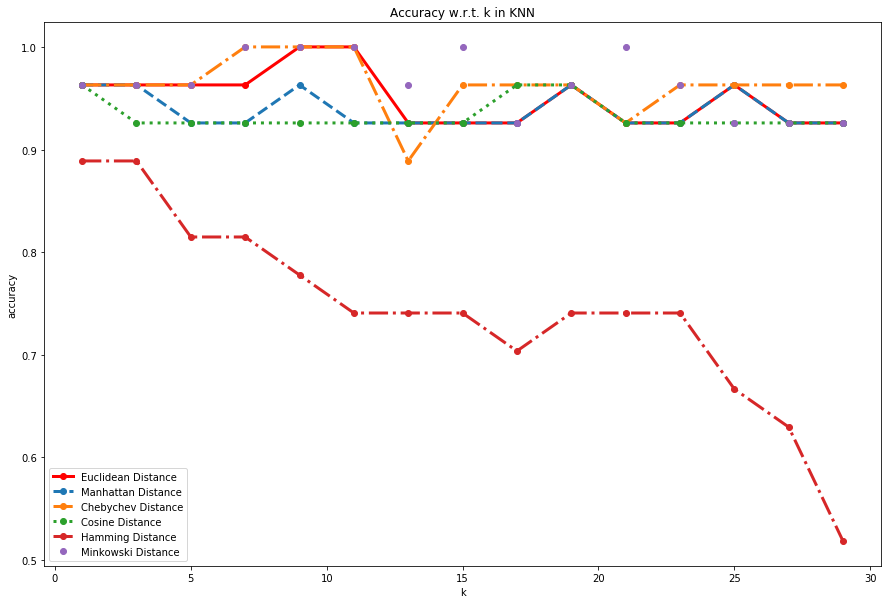

In [24]:
from matplotlib import pyplot as plt

def plot_wrt_k():
    
    plt.figure(figsize=(15,10))
    
    k_arr = []
    
    accuracy_euclidean = []
    accuracy_minkowski = []
    accuracy_manhattan = []
    accuracy_chebychev = []
    accuracy_cosine = []
    accuracy_hamming = []
    
    k = 1
    while k < 30:
        
        accuracy_euclidean.append( KNN_classifier(validation_data, 'euclidean', k) )
        
        accuracy_minkowski.append( KNN_classifier(validation_data, 'minkowski', k) )
        
        accuracy_manhattan.append( KNN_classifier(validation_data, 'manhattan', k) )
        
        accuracy_chebychev.append( KNN_classifier(validation_data, 'chebychev', k) )
        
        accuracy_cosine.append( KNN_classifier(validation_data, 'cosine', k) )
        
        accuracy_hamming.append( KNN_classifier(validation_data, 'hamming', k) )
        
        k_arr.append(k)
        
        k += 2
    
    plt.plot(k_arr, accuracy_euclidean, label = "Euclidean Distance", marker='o', linewidth = 3, color='red')
    plt.plot(k_arr, accuracy_manhattan, label = "Manhattan Distance", marker='o', linewidth = 3, linestyle='--')
    plt.plot(k_arr, accuracy_chebychev, label = "Chebychev Distance", marker='o', linewidth = 3, linestyle='-.')
    plt.plot(k_arr, accuracy_cosine, label = "Cosine Distance", marker='o', linewidth = 3, linestyle=':')
    plt.plot(k_arr, accuracy_hamming, label = "Hamming Distance", marker='o', linewidth = 3, linestyle='-.')
    plt.plot(k_arr, accuracy_minkowski, label = "Minkowski Distance", marker='o', linewidth = 3, linestyle=' ')
    plt.xlabel('k') 
    plt.ylabel('accuracy')
    plt.title('Accuracy w.r.t. k in KNN') 
    plt.legend()
    plt.show()
    
plot_wrt_k()

#### Observations:
1. The eucledian distance, chebychev and manhattan has a very good accuracy score which is probably due to the fact that the attribute's value close means the attributes are similar. But accuracy is low as k increases than 20. This is because we are taking into account the neighbours that are far away.
2. We have lowest accuracy score with cosine distance measure because our dataset is not based on angles.
3. Minkowski distance also gives us good results with p = 3.
4. The other measures do not have good performance for this dataset.